In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = "../data/phone data/dat_cumulative_rounded_tstamp.csv"
label_file_path = "../data/phone data/dat_cumulative_rounded_tstamp_annotations.json"
data = pd.read_csv(file_path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10608 non-null  int64  
 1   time    10608 non-null  float64
 2   gFx     10608 non-null  float64
 3   gFy     10608 non-null  float64
 4   gFz     10608 non-null  float64
 5   TgF     10608 non-null  float64
 6   TS      10608 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 580.2+ KB


In [4]:
data.head()

,ID,time,gFx,gFy,gFz,TgF,TS
0,0,0.001792,-0.3123,0.3785,0.5790,0.76,2022-04-20 00:00:00.001792
1,1,0.001955,-0.3123,0.3785,0.5790,0.76,2022-04-20 00:00:00.001955
2,2,0.009959,-0.2654,0.3756,0.6433,0.79,2022-04-20 00:00:00.009959
3,3,0.019970,-0.2021,0.3611,0.7366,0.84,2022-04-20 00:00:00.019970
4,4,0.030388,-0.1320,0.3509,0.7935,0.88,2022-04-20 00:00:00.030388


In [5]:
data.time = data.time.round(5)
data.TS = pd.to_datetime(data.TS)

In [6]:
data['label'] = 0

In [7]:
data.head()

,ID,time,gFx,gFy,gFz,TgF,TS,label
0,0,0.00179,-0.3123,0.3785,0.5790,0.76,2022-04-20 00:00:00.001792,0
1,1,0.00196,-0.3123,0.3785,0.5790,0.76,2022-04-20 00:00:00.001955,0
2,2,0.00996,-0.2654,0.3756,0.6433,0.79,2022-04-20 00:00:00.009959,0
3,3,0.01997,-0.2021,0.3611,0.7366,0.84,2022-04-20 00:00:00.019970,0
4,4,0.03039,-0.1320,0.3509,0.7935,0.88,2022-04-20 00:00:00.030388,0


In [8]:
with open(label_file_path) as f:
    label_data = json.load(f)

In [9]:
label_dict = {
    'Cross': 1,
    'Hook': 2,
    'Jab': 3,
    'Uppercut': 4
}

for res in label_data[0]['annotations'][0]['result']:
    annotation = res['value']
#     print(annotation)
#     print(annotation['start'])
#     print(type(annotation['start']))
    data.loc[(data['TS'] >=  pd.to_datetime(annotation['start']))\
             & (data['TS'] <=  pd.to_datetime(annotation['end']))\
             , 'label'] = label_dict[annotation['timeserieslabels'][0]]

{'start': '2022-04-20 00:00:02.818000', 'end': '2022-04-20 00:00:03.883000', 'instant': False, 'timeserieslabels': ['Jab']}
2022-04-20 00:00:02.818000
<class 'str'>
{'start': '2022-04-20 00:00:04.320000', 'end': '2022-04-20 00:00:05.393000', 'instant': False, 'timeserieslabels': ['Hook']}
2022-04-20 00:00:04.320000
<class 'str'>
{'start': '2022-04-20 00:00:05.764000', 'end': '2022-04-20 00:00:06.920000', 'instant': False, 'timeserieslabels': ['Uppercut']}
2022-04-20 00:00:05.764000
<class 'str'>
{'start': '2022-04-20 00:00:08.962000', 'end': '2022-04-20 00:00:09.905000', 'instant': False, 'timeserieslabels': ['Cross']}
2022-04-20 00:00:08.962000
<class 'str'>
{'start': '2022-04-20 00:00:10.219000', 'end': '2022-04-20 00:00:11.217000', 'instant': False, 'timeserieslabels': ['Hook']}
2022-04-20 00:00:10.219000
<class 'str'>
{'start': '2022-04-20 00:00:11.573000', 'end': '2022-04-20 00:00:12.919000', 'instant': False, 'timeserieslabels': ['Uppercut']}
2022-04-20 00:00:11.573000
<class 'st

{'start': '2022-04-20 00:01:23.943000', 'end': '2022-04-20 00:01:24.445000', 'instant': False, 'timeserieslabels': ['Cross']}
2022-04-20 00:01:23.943000
<class 'str'>
{'start': '2022-04-20 00:01:24.568000', 'end': '2022-04-20 00:01:25.168000', 'instant': False, 'timeserieslabels': ['Hook']}
2022-04-20 00:01:24.568000
<class 'str'>
{'start': '2022-04-20 00:01:25.369000', 'end': '2022-04-20 00:01:26.116000', 'instant': False, 'timeserieslabels': ['Uppercut']}
2022-04-20 00:01:25.369000
<class 'str'>
{'start': '2022-04-20 00:01:27.304000', 'end': '2022-04-20 00:01:27.971000', 'instant': False, 'timeserieslabels': ['Jab']}
2022-04-20 00:01:27.304000
<class 'str'>
{'start': '2022-04-20 00:01:28.164000', 'end': '2022-04-20 00:01:28.687000', 'instant': False, 'timeserieslabels': ['Hook']}
2022-04-20 00:01:28.164000
<class 'str'>
{'start': '2022-04-20 00:01:28.851000', 'end': '2022-04-20 00:01:29.564000', 'instant': False, 'timeserieslabels': ['Uppercut']}
2022-04-20 00:01:28.851000
<class 'st

In [10]:
data[data['label']!= 0]

,ID,time,gFx,gFy,gFz,TgF,TS,label
274,274,2.81824,-0.4188,0.9098,-0.0429,1.00,2022-04-20 00:00:02.818238,3
275,275,2.83284,-0.4047,0.8964,-0.0175,0.98,2022-04-20 00:00:02.832835,3
276,276,2.83312,-0.4047,0.8964,-0.0175,0.98,2022-04-20 00:00:02.833124,3
277,277,2.84734,-0.4032,0.8888,-0.0031,0.98,2022-04-20 00:00:02.847344,3
278,278,2.85962,-0.4215,0.8979,-0.0219,0.99,2022-04-20 00:00:02.859622,3
...,...,...,...,...,...,...,...,...
10396,10396,107.07016,-0.9094,4.1201,0.5209,4.25,2022-04-20 00:01:47.070159,4
10397,10397,107.08156,-0.7899,4.1626,0.5290,4.27,2022-04-20 00:01:47.081557,4
10398,10398,107.09300,-0.2437,3.8563,0.4845,3.89,2022-04-20 00:01:47.093002,4
10399,10399,107.10417,-0.0434,3.4925,0.1278,3.50,2022-04-20 00:01:47.104170,4


In [11]:
data['label'].value_counts()

0    6089
2    1663
4    1412
3     966
1     478
Name: label, dtype: int64

<AxesSubplot:xlabel='time', ylabel='gFx'>

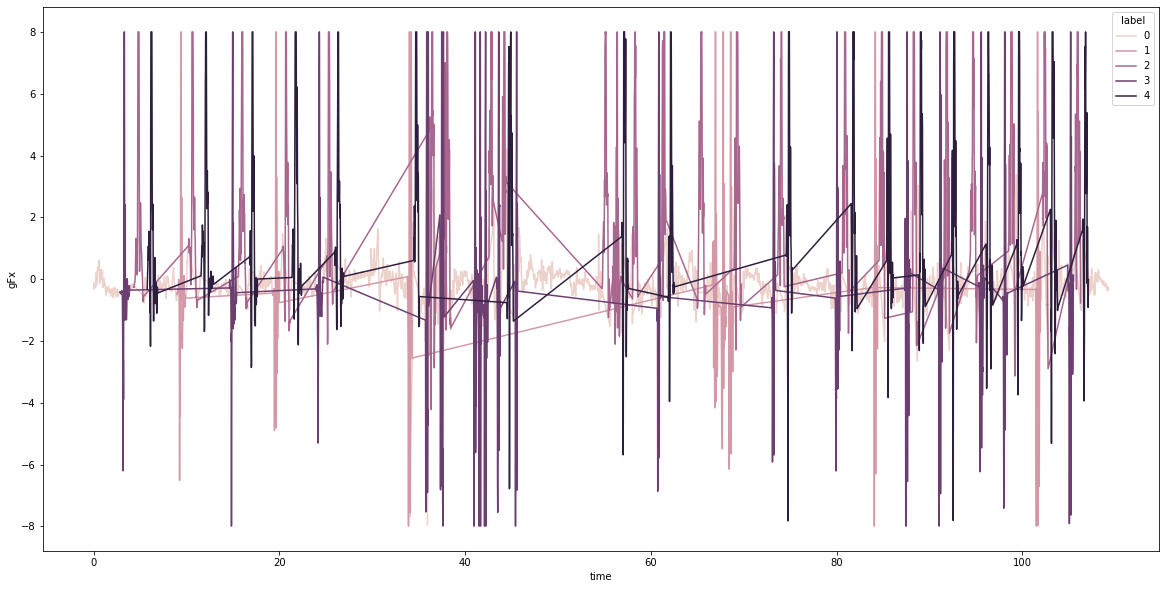

In [12]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data, x='time', y='gFx', hue='label')

In [13]:
data.head()

,ID,time,gFx,gFy,gFz,TgF,TS,label
0,0,0.00179,-0.3123,0.3785,0.5790,0.76,2022-04-20 00:00:00.001792,0
1,1,0.00196,-0.3123,0.3785,0.5790,0.76,2022-04-20 00:00:00.001955,0
2,2,0.00996,-0.2654,0.3756,0.6433,0.79,2022-04-20 00:00:00.009959,0
3,3,0.01997,-0.2021,0.3611,0.7366,0.84,2022-04-20 00:00:00.019970,0
4,4,0.03039,-0.1320,0.3509,0.7935,0.88,2022-04-20 00:00:00.030388,0


In [14]:
data.to_csv(file_path.split('.csv')[0]+'_labeled.csv', index=False)